## HDBSCAN Clustering

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import hdbscan



from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from IPython.display  import display_html

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw=True)

In [5]:
def average_point(cluster_label):
    '''
    
    This function is to help find the centriod of a 
    cluster.
    
    Cluster_label is the number assignedf to the cluster
    not the target label.
    
    '''
    #mem_cluster= digits.data[np.argwhere(fin_clusterer.labels_==0).reshape(1, -1)[0]]
    #when using digits,data
    mem_cluster = digits.images[np.argwhere(clusterpt_cut== cluster_label).reshape(1, -1)[0]]
    #mem_cluster = digits.images[np.argwhere(clusterer.labels_== cluster_label).reshape(1, -1)[0]]

    #centriod= np.zeros(64)
    avg = np.zeros(shape=(8,8))
    for i in range(0,len(mem_cluster)):
        avg += mem_cluster[i]
    return(avg/len(mem_cluster))

    

`Loading data`

In [6]:
digits = load_digits()
data = digits.data


### Dimensionality reduction

We are using TSNE to reduce the 64 dimensions of our dataset to 2 in order to be able to visualize it.

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


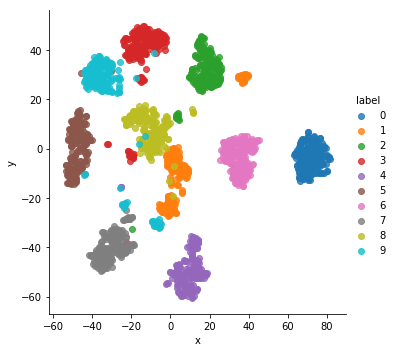

In [7]:
data_embedded = TSNE(n_components = 2, random_state=0).fit_transform(data)
df = pd.DataFrame(data_embedded, columns = ['x','y'])
df['label']= digits.target
#hue='label'
sns.lmplot(x= 'x',y= 'y', data= df,hue='label', fit_reg = False,size=5)

In [9]:
clusterer= hdbscan.HDBSCAN(min_cluster_size=12, min_samples=1,prediction_data=True)
clusterer.fit(digits.data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=12, min_samples=1, p=None,
    prediction_data=True)

Text(0, 0.5, 'frequency')

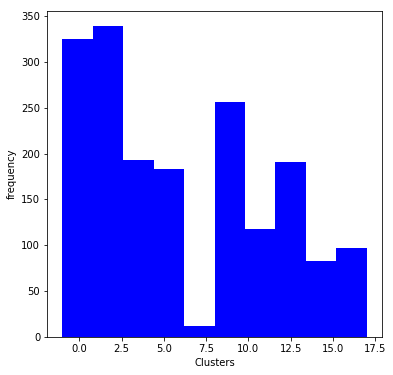

In [10]:
plt.figure(figsize=(6,6))
plt.hist(clusterer.labels_, color = ['blue']);
plt.xlabel('Clusters')
plt.ylabel('frequency')

### Visualizing the clustered data points with a Dendrogram

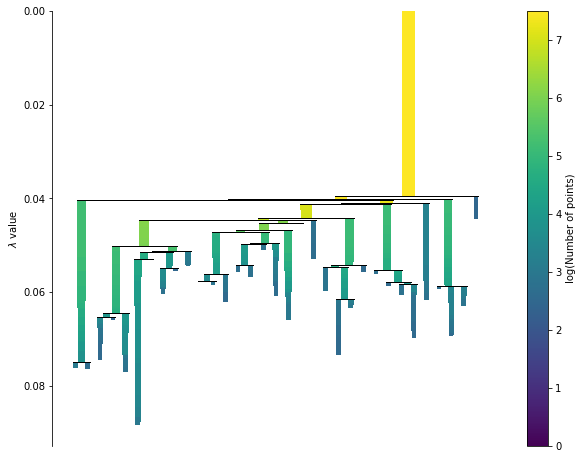

In [11]:
plt.figure(figsize=(10,8))
clusterer.condensed_tree_.plot(log_size=True)

In [12]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]
lambda_value = list(set(cluster_tree['lambda_val'].values))
lambda_value.append(0.03)
sorted_list = sorted(lambda_value)

`Looking for cluster at various level of lambda in the condensed tree`

`We visulaized some of the clusters`


`

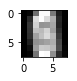

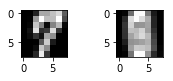

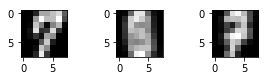

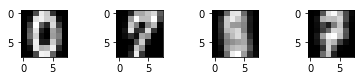

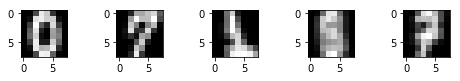

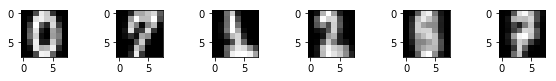

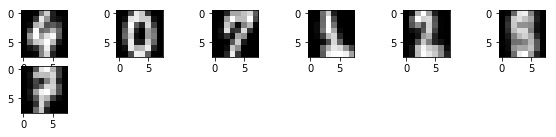

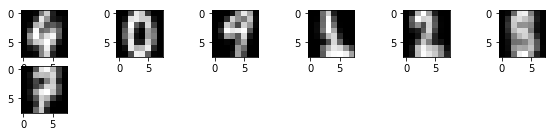

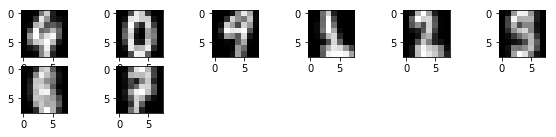

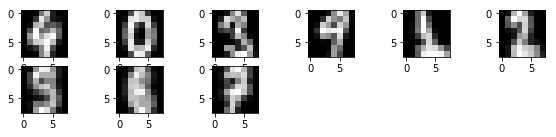

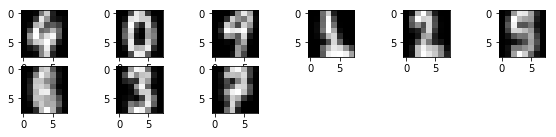

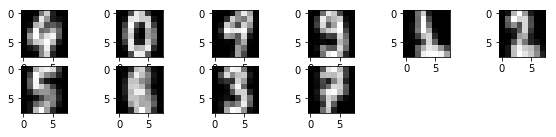

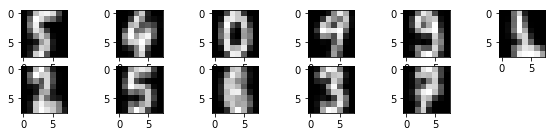

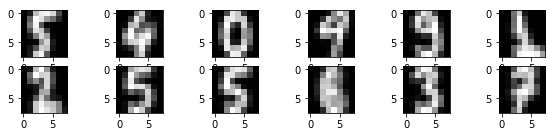

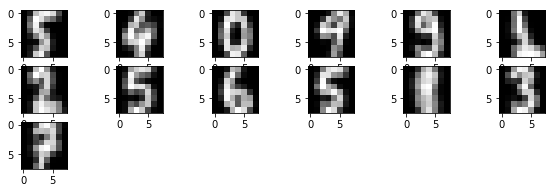

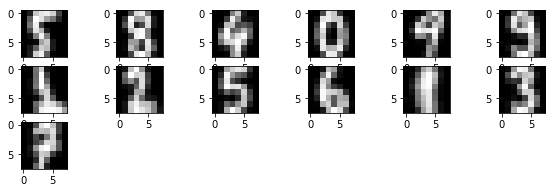

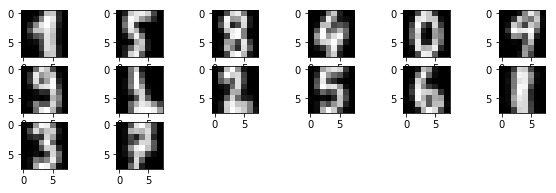

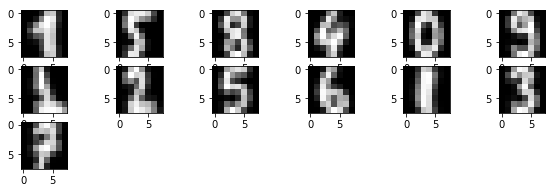

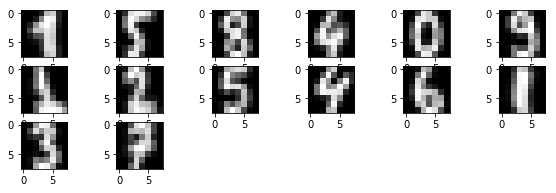

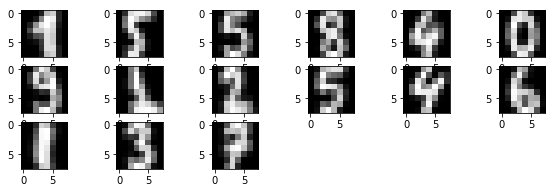

In [14]:
for i in sorted_list[0:20]:
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/i, min_cluster_size=12)
    plt.figure(figsize = (10,6))
    for j in range(0,clusterpt_cut.max()+1):
        plt.subplot(6,6,j+1)
        plt.imshow(np.reshape(average_point(j), (8,8)),cmap=plt.cm.gray)
   